In [ ]:
# Reminder to add your name, date, and assignment as a markdown cell at the top! 


# Lab to Planet: Notebook 2 — Be the Plot
****Goal:** Learn how to compute the mean, standard deviation, and standard error of the mean (SEM) for replicate measurements, and visualize them with simple plots.

This notebook assumes **no prior programming experience**. We will explain each step clearly and keep the code simple.

## Part 1: Theory Primer — What are Mean, Standard Deviation, and SEM?

Imagine you measure the same quantity multiple, $N$, times at the same $x$-value (replicates). These measurements will differ slightly due to random errors.

- **Mean**: The average of the measurements. It is our best estimate of the true value.
  
  $
  \bar{y} = \frac{1}{m} \sum_{j=1}^N y_j
  $

- **Standard Deviation (std)**: Tells us how spread out the measurements are.
  
  $
  s = \sqrt{\frac{1}{N-1} \sum_{j=1}^N (y_j - \bar{y})^2}
  $
  
  The $N-1$ part is here supposed to account for the number of degrees of freedom. We have $N$ samples, but already used up the mean as one parameter, so $N-1$ is the number of degrees of freedom. In practice, using the variance, which is $s^2$ but using $N$ instead of $N-1$ should not matter much.

- **Standard Error of the Mean (SEM)**: Tells us how precisely we know the mean.
  
  $
  SEM = \frac{s}{\sqrt{N}}
  $

If you take more replicates, SEM gets smaller because your mean becomes more reliable. However, that decrease in error is quite slow, only as $\propto \frac{1}{\sqrt{N}}$.

### Import Matplotlib and other Libraries</span>

Import the matplotlib.pyplot library 


In [1]:
#run this cell 
import matplotlib.pyplot as plt #for plotting
import math  # for square root
import numpy as np  # for arrays
import pandas as pd # for dataframes

### Enter replicate measurements
We will use the same simple example from notebook1: 

Imagine you have five cubes of different sizes. You measure the width of each cube three times. In this example, each cube represents your x variable, and the measured widths are your y variable. Each x value has three replicate measurements.

In [2]:
# Dictionary: keys are cube numbers (x-values), values are replicate measurements
replicates = {
    1: [2.18, 2.05, 2.12],
    2: [3.92, 4.08, 3.98],
    3: [6.05, 6.22, 6.10],
    4: [8.16, 8.02, 8.11],
    5: [10.05, 10.22, 10.10]
}

# Create DataFrame, this is a way to store data, similar to a table in excel.

cube = pd.DataFrame.from_dict(
    replicates,
    orient="index",
    columns=["Measurement 1", "Measurement 2", "Measurement 3"]
)

# Name the index
cube.index.name = "Cube"

In [3]:
# Calculate statistics
means = cube.mean(axis=1)
stds = cube.std(axis=1, ddof=1)

# Convert to numpy arrays for convenience
x_values = np.array(cube.index)
means = np.array(means)
stds = np.array(stds)

print('Cube number:', x_values)
print('Mean:', means)
print('Std:', stds)

Cube number: [1 2 3 4 5]
Mean: [ 2.11666667  3.99333333  6.12333333  8.09666667 10.12333333]
Std: [0.06506407 0.08082904 0.08736895 0.07094599 0.08736895]


In [4]:
# To get the SEM we need to know the number of replicates
# Number of replicates
n = cube.shape[1]

In [5]:
sems = stds / np.sqrt(n)

# Convert to numpy arrays for convenience
sems = np.array(sems)

In [6]:
print('SEM:', sems)

SEM: [0.03756476 0.04666667 0.05044249 0.04096069 0.05044249]


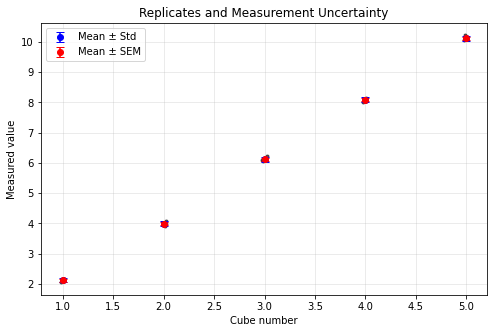

In [7]:
# Plot raw replicates with small horizontal jitter

plt.figure(figsize=(8,5))

for col in ["Measurement 1", "Measurement 2", "Measurement 3"]:
    jitter = (np.random.rand(len(cube)) - 0.5) * 0.05  # small horizontal jitter
    plt.plot(x_values + jitter, cube[col], 'k.', alpha=0.6)

# Plot mean ± std
plt.errorbar(x_values, means, yerr=stds, fmt='o', color='blue', capsize=4, label='Mean ± Std')

# Plot mean ± SEM
plt.errorbar(x_values, means, yerr=sems, fmt='o', color='red', capsize=4, label='Mean ± SEM')

plt.xlabel('Cube number')
plt.ylabel('Measured value')
plt.title('Replicates and Measurement Uncertainty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 1. Add a replicate to cube 3, and see how the SEM changes

In [8]:
# Example: Adding a replicate for Cube 1
cube.loc[1, "Measurement 4"] = 2.20  # new measurement

# Number of replicates per cube
n = cube.notna().sum(axis=1)  # counts non-NaN values for each row along column 1

# Calculate statistics including new replicate
means = cube.mean(axis=1)
stds = cube.std(axis=1, ddof=1) # NOTE: axis = 1 means that this is for the first column (you will change this for cube 3)
new_sems = stds / np.sqrt(n)

print('The old SEM: ',sems)
print('New SEM', np.array(new_sems))

The old SEM:  [0.03756476 0.04666667 0.05044249 0.04096069 0.05044249]
New SEM [0.03375772 0.04666667 0.05044249 0.04096069 0.05044249]


In [9]:
# Add your code here:

cube.loc[3, "Measurement 4"] = 6  # new measurement

# Number of replicates per cube
n = cube.notna().sum(axis=1)  # counts non-NaN values for each row along column 1

# Calculate statistics including new replicate
means = cube.mean(axis=1)
stds = cube.std(axis=1, ddof=1) 
new_sems = stds / np.sqrt(n)

print('The old SEM: ',sems)
print('New SEM', np.array(new_sems))

The old SEM:  [0.03756476 0.04666667 0.05044249 0.04096069 0.05044249]
New SEM [0.03375772 0.04666667 0.04714782 0.04096069 0.05044249]


## 2. Describe how SEM changes when more replicates are added

Increasing the number of replicates decreases the SEM. SEM is divided by the square root of the number of replicates. This makes sense because as you measure more times, your mean becomes more reliable. 

## 3. Double the number of replicates for all x-values (simulate new values) display the dataframe ('cube').

In [10]:
replicates_new = {
    1: [2, 2.15, 2.10],
    2: [3.99, 4.0, 3.99],
    3: [6.0, 6.25, 6.12],
    4: [8.11, 8.0, 8.11],
    5: [10.09, 10.28, 10.08]}
    
cube2 = pd.DataFrame.from_dict(replicates_new,orient="index",columns=["Measurement 4", "Measurement 5", "Measurement 6"])

# Name the index
cube2.index.name = "Cube"
    
cube = pd.concat([cube, cube2], axis = 1)
cube

,Measurement 1,Measurement 2,Measurement 3,Measurement 4,Measurement 4,Measurement 5,Measurement 6
Cube,,,,,,,
1,2.18,2.05,2.12,2.2,2.00,2.15,2.10
2,3.92,4.08,3.98,NaN,3.99,4.00,3.99
3,6.05,6.22,6.10,6.0,6.00,6.25,6.12
4,8.16,8.02,8.11,NaN,8.11,8.00,8.11
5,10.05,10.22,10.10,NaN,10.09,10.28,10.08


## 4. How does the SEM change when the number of replicates double? 

In [11]:
# Number of replicates per cube
n = cube.notna().sum(axis=1)  # counts non-NaN values for each row along column 1

# Calculate statistics including new replicate
means = cube.mean(axis=1)
stds = cube.std(axis=1, ddof=1) 
new_sems = stds / np.sqrt(n)

print('The old SEM: ',sems)
print('New SEM', np.array(new_sems))

The old SEM:  [0.03756476 0.04666667 0.05044249 0.04096069 0.05044249]
New SEM [0.02689106 0.02092314 0.03766122 0.02513298 0.0372976 ]


When the replicates double, the SEM decreases and the mean becomes more precise. 

## 5. Plot only Mean ± SEM and explain why SEM is smaller than std.

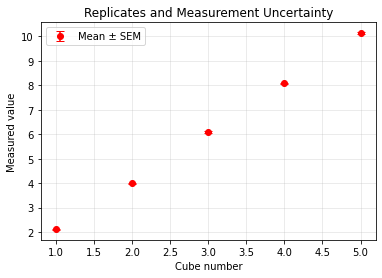

In [13]:
plt.errorbar(x_values, means, yerr=new_sems, fmt='o', color='red', capsize=4, label='Mean ± SEM')

plt.xlabel('Cube number')
plt.ylabel('Measured value')
plt.title('Replicates and Measurement Uncertainty')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The standard deviation measures how spread out individual measurements are.The SEM shows how precisely the mean is known. SEM is calculated by dividing the standard deviation by the square root of the number of replicates, so it decreases as more measurements are taken. It is always smaller than the standard deviation because averaging multiple values reduces uncertainty in the mean.

## Part 2: Unweighted Linear Regression & Correlation (Beginner Version)

**Goal:** Fit a straight line $y = a + b x$ without measurement errors/weights. Compute the squared residuals, $R^2$, and the Pearson correlation $r_p$ between $x$ and $y$, and make simple plots.

## Theory Primer — Unweighted OLS (by hand)
We want to find slope b and intercept a for a line that best matches the data points ${x_i, y_i}$. In ordinary least squares (OLS), we choose $a$ and $b$ to minimize the sum of squared residuals sum $R_i^2$, where $R_i = y_i - (a + b x_i)$.

To compute the best fit $a$ and $b$ easily,  let $\bar{x}$ be the average of $x$ values and $\bar{y}$ the average of $y$ values. 

Then:
$
b = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2},
$
and
$
a = \bar{y} - b  \bar{x}.
$

## 6. Generate some (x, y) data

The function np.linspace is used to create a sequence of evenly spaced numbers between two values.

    np.linspace(start, stop, num)
    
    where start and stop are included in the list, and num is the total number of values to generate.

x = [ ,  ,  ,  ]
y = [ ,  ,  ,  ]

x and y should not be the same values, but they need to be the same length = 10

In [41]:
#example list using the np.linspace function
example_list = np.linspace(0,20,5) #create a list of length 5, from 0 to 20
print('Example list using np.linspase: ', example_list)

Example list using np.linspase:  [ 0.  5. 10. 15. 20.]


In [17]:
x =  #use np.linspace to create a list from 0 to 10, length = 10 variables
y = np.array([2, 2.5, 3.6, 3.9, 5, 7, 7.9, 8.4, 9.5, 10]) #create data (10 variables)
print('x =', x)
print('y =', y)

x = [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
y = [ 2.   2.5  3.6  3.9  5.   7.   7.9  8.4  9.5 10. ]


## 7. Compute the Slope (by hand)

In [22]:
# 1) Means of x and y
x_bar =  np.mean(x)  # mean of x
y_bar =  np.mean(y)  # mean of y

print('The mean of x is: ', x_bar)
print('The mean of y is: ', y_bar)

The mean of x is:  0.5
The mean of y is:  5.9799999999999995


In [23]:
# 2) Centered sums

# This term appears in the denominator of the slope (b)
Sxx = float(np.sum((x - x_bar)**2)) # Represents the total variability in the independent variable

# This term appears in the numerator of the slope (b)
Sxy = float(np.sum((x - x_bar) * (y - y_bar))) # Measures how x and y vary together (covariation)

# 3) Slope and intercept
b = Sxy / Sxx
a = y_bar - b * x_bar
print('Slope b =', b)
print('Intercept a =', a)

Slope b = 8.672727272727274
Intercept a = 1.6436363636363627


## Residuals, $R^2$, and correlation $r_p$

- **Residuals:**

    $
    R_i = y_i - (a + b x_i).
    $

To measure the overall error of the model, we square each residual and add them together:


- **Sum of Squared Errors (SSE)** = $\sum_i R_i^2
$

    SSE measures the unexplained variation in the data. Smaller values mean a better fit.

Before fitting any model, the data already has variability. 

- **Syy is the total variation of $y$ about its mean**

    $
    \mathrm{Syy} = \sum_i (y_i - \bar{y})^2 ,
    $

    where $\bar{y}$ is the mean of $y$.

    This represents how spread out the data is without using a model.


The sum of $R_i^2$ measures how much of the variation in $y$ is explained by the model; values close to 1 are better. The summed $R_i^2$ relate to the $\chi^2$ misfit metric discussed later.

- **Coefficient of Determination ($R^2$):**

    $
    R^2 = 1 - \frac{\mathrm{SSE}}{\mathrm{Syy}}
    $

Correlation $r_p$ (the linear, Pearson correlation of the data not to be confused with the residuals) measures linear association between $x$ and $y$; values close to 1 (or $-1$) indicate strong linear relation.


- **Pearson correlation coefficient $r_p$** 
measures the strength and direction of a linear relationship between two variables, $x$ and $y$. It is defined as:

    $
    r_p = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}
    $

    where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$, respectively.This coefficient is independent of any fitted model and only measures the linear association between the variables.


## 8. Compute Residuals

In [24]:
# Residuals
res =  y - (a + b*x) # compute the residuals using the x and y data and the slope, intercept from the previous cell

print('Residuals:', res)

Residuals: [ 0.35636364 -0.10727273  0.02909091 -0.63454545 -0.49818182  0.53818182
  0.47454545  0.01090909  0.14727273 -0.31636364]


In [25]:
# R^2 measurement
SSE = float(np.sum(res**2))
Syy = float(np.sum((y - y_bar)**2))
R2 = 1.0 - SSE / Syy

print('R^2 =', R2)

R^2 = 0.9817147330602659


In [27]:
# Correlation 
r_xy = Sxy / math.sqrt(Sxx * Syy)

print('Correlation r =', r_xy)

Correlation r = 0.9908151861271941


## 9. Plot the Data you created in Step 6 as a Scatter Plot
Make sure to label the axis. 

Text(0.5, 0, 'list 1')

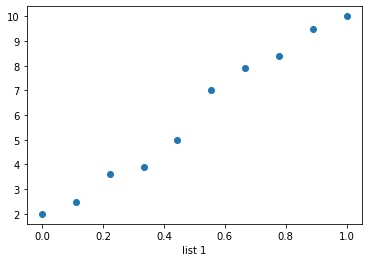

In [29]:
## Scatter Plot of x and y data

plt.scatter(x, y)
plt.xlabel('list 1')

## 10. Add the Fit Line

x_grid = np.linspace(float(x.min()) - 0.5, float(x.max()) + 0.5, 200)

y_fit = b * x + a  {**use the fit you computed by hand**}

plt.plot(x_grid, y_fit, label='unweighted fit')

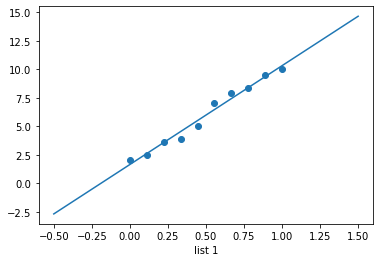

In [31]:
## Scatter Plot of x and y data with hand computed Fit

plt.scatter(x, y)
plt.xlabel('list 1')

x_grid = np.linspace(float(x.min()) - 0.5, float(x.max()) + 0.5, 200)
y_fit = b * x_grid + a

plt.plot(x_grid, y_fit)

## 11. Plot x versus the Residuals
Add a line for residual = 0. 

plt.axhline(0, color='k', lw=1) #you can use this code to add the line

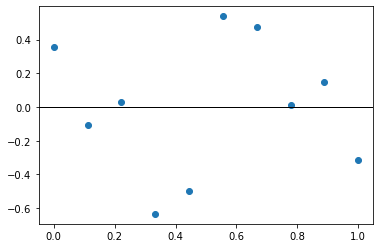

In [33]:
plt.scatter(x, res)
plt.axhline(0, color = 'k', lw = 1)

## 12. Add an outlier (increase one y value by +0.5) and recompute — how do a, b,  $R^2$, and residuals change?


In [36]:
y[0] = y[0] +0.5

x_bar =  np.mean(x)  # mean of x
y_bar =  np.mean(y)  # mean of y

# This term appears in the denominator of the slope (b)
Sxx = float(np.sum((x - x_bar)**2)) # Represents the total variability in the independent variable

# This term appears in the numerator of the slope (b)
Sxy = float(np.sum((x - x_bar) * (y - y_bar))) # Measures how x and y vary together (covariation)

# 3) Slope and intercept
b = Sxy / Sxx
a = y_bar - b * x_bar
print('Slope b =', b)
print('Intercept a =', a)


res =  y - (a + b*x)
print(res)

SSE = float(np.sum(res**2))
Syy = float(np.sum((y - y_bar)**2))
R2 = 1.0 - SSE / Syy

print('R^2 =', R2)

Slope b = 7.9363636363636365
Intercept a = 2.1618181818181816
[ 1.33818182 -0.54363636 -0.32545455 -0.90727273 -0.68909091  0.42909091
  0.44727273  0.06545455  0.28363636 -0.09818182]
R^2 = 0.9417400321086409


Adding an outlier changes the slope and intercept makes R^2 smaller, and increases the residuals. This shows that even one data point can affect the best-fit line and how well the model explains the data.

## 13. Plot residuals vs. fitted y (instead of x) — do you see any pattern?

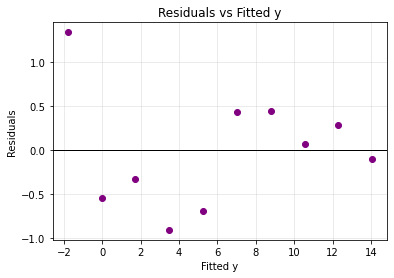

In [40]:
plt.figure(figsize=(6,4)) 

x_grid = np.linspace(float(x.min()) - 0.5, float(x.max()) + 0.5, 10)
y_fit = b * x_grid + a

plt.plot(y_fit, res, 'o', color='purple') 
plt.axhline(0, color='k', lw=1) 

plt.xlabel('Fitted y') 
plt.ylabel('Residuals') 
plt.title('Residuals vs Fitted y') 
plt.grid(True, alpha=0.3) 

The residuals are mostly scattered around zero the outlier creates a larger positive residual There is no clear pattern